In [1]:
import numpy as np              # біблиотека для аналізу даних
import pandas as pd             # біблиотека для аналізу даних
import matplotlib as mpl
import matplotlib.pyplot as plt # Інтерфейс бібліотеки для візуалізації

In [2]:
from IPython.display import Image     # Вбудовані функції для зручної роботи

In [3]:
Image(url='https://matplotlib.org/stable/_static/logo2_compressed.svg')

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [81]:
iris = pd.read_csv('../datasets/iris.csv')
flights = pd.read_csv('../datasets/flights.csv')
mtcars = pd.read_csv('../datasets/mtcars.csv')

xs = np.linspace(0, 2, 100)
df = pd.DataFrame({'x': xs, 'y': xs, 'y2': xs ** 2, 'y3': xs ** 3})
df.head(3)

,x,y,y2,y3
0,0.000000,0.000000,0.000000,0.000000
1,0.020202,0.020202,0.000408,0.000008
2,0.040404,0.040404,0.001632,0.000066


## Архітектура 
**Matplotlib** має три основних шари:
* Шар нижнього рівня (backend);
* Шар малюнків;
* Шар скриптів;

**Шар нижнього рівня** містить три інтерфейсних класи: 
* _figure canvas_ - канва малюнка, що визначає область малюнка;
* _renderer_, що малює на канві;
* _event_, що обробляє ввод користувача.

**Шар малюнків** малює на канві за допомогою Renderer'а.  
Все, що знаходиться на малюнку Matplotlib, є екземпляром шару малюнка. Заголовок, мітки – індивидуальні об'єкти шару малюнків.  
    
**Шар скриптів** це полегшений верхньорівневий інтерфейс

## Терміни

In [9]:
Image(url='https://matplotlib.org/stable/_images/anatomy.png')

* **Figure**  
Весь малюнок, де відображаються дані (окреме вікно, Jupyter-віджет, т.п.).  
Figure має один або більше дочірніх графіка - Axes.  

* **Axes**  
Власне окремий графік - область, де точка має координати x-y або x-y-z.  
Axes містить два, або три Axis

* **Axis**  
Вісь графіка

* **Artist**  
Все, що є на малюнку є об'єктом класу Artist, навіть Figure, Axes, і Axis, а також Text, Line2D і т.д.  

## Налаштування

#### Бекенди
Програмі засоби, за допомогою яких малюється графік  
https://matplotlib.org/stable/tutorials/introductory/usage.html#backends

In [86]:
# Бекенди matplotlib
mpl.rcsetup.all_backends

['GTK3Agg',
 'GTK3Cairo',
 'MacOSX',
 'nbAgg',
 'Qt4Agg',
 'Qt4Cairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo',
 'agg',
 'cairo',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']

In [84]:
# Вибір бекенду
mpl.use('nbAgg')

In [75]:
# Бекенди matplotlib в IPython
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [88]:
# Вибір бекенду в IPython
%matplotlib inline

In [89]:
# Поточний бекенд
mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

#### Інтерактивний режим
Малює графік відразу, не чекаючи команди `plt.show()`  
https://matplotlib.org/stable/tutorials/introductory/usage.html#what-is-interactive-mode

In [16]:
mpl.is_interactive()

False

In [ ]:
mpl.interactive(False) # plt.ioff()

In [15]:
mpl.interactive(True) # plt.ion()

#### Стилі

In [92]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [8]:
# Використати певний стиль графіків
plt.style.use('classic')

### Як побудувати графік?

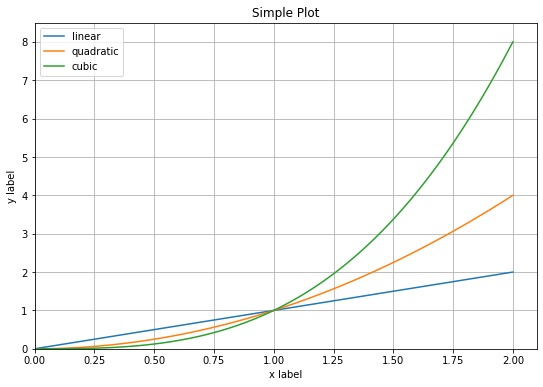

In [37]:
# Pyplot-style
plt.figure(figsize=(9,6))
plt.plot(df.x, df.y, label='linear')  # Plot some data on the axes.
plt.plot(df.x, df.y2, label='quadratic')  # Plot more data on the axes...
plt.plot('x', 'y3', '', label='cubic', data=df)  # ... and some more.
plt.xlabel('x label')  # Add an x-label to the axes.
plt.ylabel('y label')  # Add a y-label to the axes.
plt.title("Simple Plot")  # Add a title to the axes.
plt.xlim((0, 2.1)) # Set x-axis limits
plt.ylim(0, 8.5)  # Set y-axis limits
#plt.axis([0, 2.1, 0, 8.5]) # Set axis' limits
plt.legend()  # Add a legend.
plt.grid()
# plt.savefig('image.png', dpi=300)
plt.show()

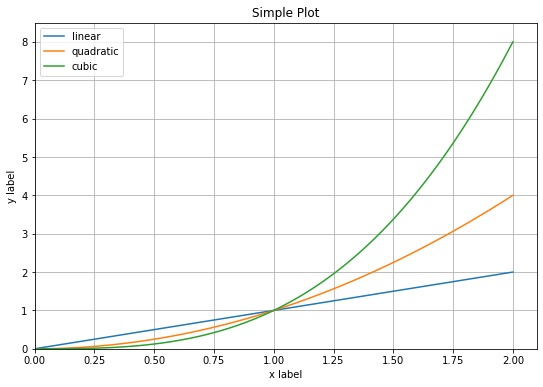

In [7]:
# OOP-style
fig, ax = plt.subplots(figsize=(9,6), nrows=1, ncols=1, sharex=False, sharey=False)  # Create a figure and an axes.
ax.plot(df.x, df.y, label='linear')  # Plot some data on the axes.
ax.plot(df.x, df.y2, label='quadratic')  # Plot more data on the axes...
ax.plot('x', 'y3', '', label='cubic', data=df)  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 8.5)
ax.legend()  # Add a legend.
ax.grid() # Add grid

#ax.figure.savefig('image.png', dpi=300)
plt.show()

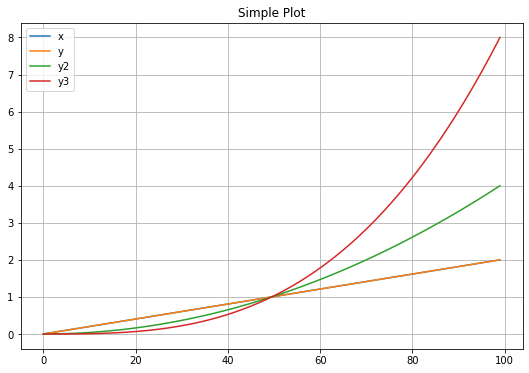

In [64]:
# Pandas-style
ax = df.plot(kind='line', 
             figsize=(9,6), 
             title="Simple Plot", 
             #xlim=[0, 2.1],
             #ylim=(0, 8.5),
             legend=True, 
             grid=True, 
             #x='x', 
             #subplots=True
            )
#ax.figure.savefig('image.png', dpi=300)
plt.show()

### Типи графіків
* **plot()** - базовий, **швидкий** line/scatter
* **scatter()** - точковий графік (повільніший)
* **bar() / barh()** - стовпчикова діаграмма
* **pie()** - секторна діаграмма
* **hist()** - гістограмма
* **table()** - відображення таблиці на графіку
* **polar()** - полярний графік
* **imshow()** - відображення картинки
* **pcolormesh() / contour()** - heatmap-подібний графік
* **streamplot() / quiver()** - відображення векторів
* **semilogx() / semilogy() / loglog()** - створення логарифмічних графіків 
### Додаткові функції
* **fill()** - відображення замкнених полігональних структур
* **fill_between()** - заповнює область між двома горизонтальними лініями
* **fill_betweenx()** - заповнює область між двома вертикальними лініями
* **axhspan()** - додає горизонтальний заповнений прямокутник
* **axvspan()** - додає вертикальний заповнений прямокутник
* **legend()** - автоматичне створення легенди
* **grig()** - автоматичне створення легенди

### Plot
1. `plot([x], y, [fmt], *, data=None, **kwargs)`  
2. `plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)`  
**kwargs**  
`linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None`

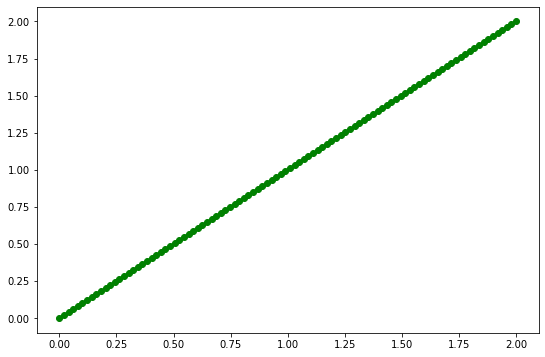

In [54]:
plt.figure(figsize=(9,6))
plt.plot(df.x, df.y, 'go--', linewidth=2, markersize=6)
plt.plot(df.x, df.y, marker='o', linestyle='dashed', color='green', linewidth=2, markersize=6)
plt.show()df[['y','y2','y3']]

Cтрока формату графіку  
`fmt = '[marker][line][color]'`  
підходять символи, що відммічені жирним шрифтом

#### Маркери
https://matplotlib.org/stable/api/markers_api.html
* **'.'** - point
* **','** - pixel
* **'o'** - circle
* **'v'** - triangle_down
* **'^'** - triangle_up
* **'<'** - triangle_left
* **'>'** - triangle_right
* **'1'** - tri_down
* **'2'** - tri_up
* **'3'** - tri_left
* **'4'** - tri_right
* **'8'** - octagon
* **'s'** - square
* **'p'** - pentagon
* **'P'** - plus (filled)
* **'*'** - star
* **'h'** - hexagon1
* **'H'** - hexagon2
* **'+'** - plus
* **'x'** - x
* **'X'** - x (filled)
* **'D'** - diamond
* **'d'** - thin_diamond
* **'|'** - vline
* **'_'** - hline
* 0 - tickleft
* 1 - tickright
* 2 - tickup
* 3 - tickdown
* 4 - caretleft
* 5 - caretright
* 6 - caretup
* 7 - caretdown
* 8 - caretleft (centered at base)
* 9 - caretright (centered at base)
* 10 - caretup (centered at base)
* 11 - caretdown (centered at base)

#### Стилі ліній
https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
* **'-'** / 'solid' - суцільна лінія
* **'--'** / 'dashed' - штрихова лінія
* **':'** / 'dotted' - пунктирна лінія
* **'-.'** / 'dashdot' - штрихпунктирна лінія
* **' '** / **''** / None - відсутня лінія
* `(offset, (on_off_seq))` - складна лінія  
Наприклад `(0, (3, 10, 1, 15))` означає (3pt line, 10pt space, 1pt line, 15pt space) with no offset

#### Кольори
https://matplotlib.org/stable/api/colors_api.html
* одна з букв {**'b'**, **'g'**, **'r'**, **'c'**, **'m'**, **'y'**, **'k'**, **'w'**}, 
що є скороченнями blue, green, red, cyan, magenta, yellow, black, white.  
* RGB / RGBA (red, green, blue, alpha) в інтервалі [0, 1] - **(0.1, 0.2, 0.5)** або (0.1, 0.2, 0.5, 0.3);
* hex RGB / RGBA строка - **'#0f0f0f'** або '#0f0f0f80';
* скорочена hex RGB / RGBA строка - **'#abc'** == '#aabbcc';
* відтінки сірого, що представлені у вигляді числа в інтервалі [0, 1] - **'0.5'**;
* назва кольору в X11/CSS4 - **'Aquamarine'**;
* назва кольору в xkcd з префіксом - **'xkcd:sky blue'**;
* назва кольору в Tableau 'T10' categorical palette - **'tab:olive'**;

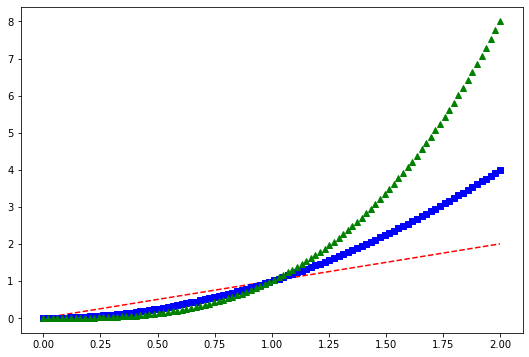

In [16]:
plt.figure(figsize=(9,6))
# plt.plot(df.x, df[['y','y2','y3']], 'r--')
plt.plot(df.x, df.y, 'r--', df.x, df.y2, 'bs', df.x, df.y3, 'g^')
plt.show()

### Scatter
`scatter(x, y, s=None, c=None, marker='o', cmap='viridis', norm=None, 
    vmin=None, vmax=None, alpha=None, linewidths=1.5, *, 
    edgecolors='face', plotnonfinite=False, data=None, **kwargs)`   

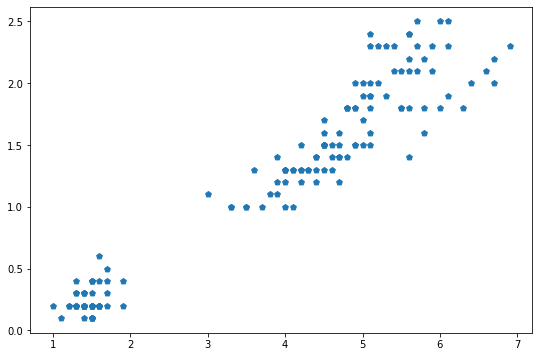

In [80]:
plt.figure(figsize=(9,6))
plt.scatter(x='PetalLengthCm', y='PetalWidthCm', marker='p', data=iris)
plt.show()

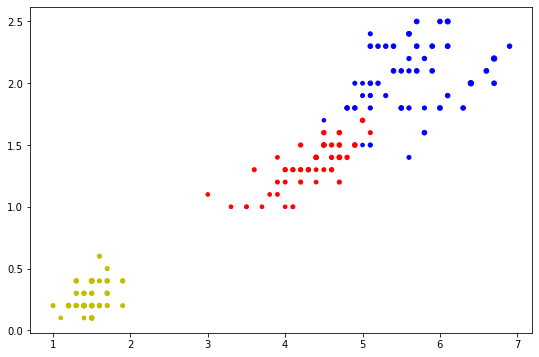

In [108]:
iris['SpeciesColor'] = iris['Species'].map({'Iris-setosa': 'y', 'Iris-versicolor': 'r', 'Iris-virginica': 'b'})
iris['SepalArea'] = iris['SepalLengthCm'] * iris['SepalWidthCm']

plt.figure(figsize=(9,6))
plt.scatter(x='PetalLengthCm', y='PetalWidthCm', c='SpeciesColor', s='SepalArea', data=iris)
plt.show()

### Bar
`bar(x, height, width=0.8, bottom=0, *, align='center', data=None, **kwargs)`   
`barh(y, width, height=0.8, left=0, *, align='center', data=None, **kwargs)`

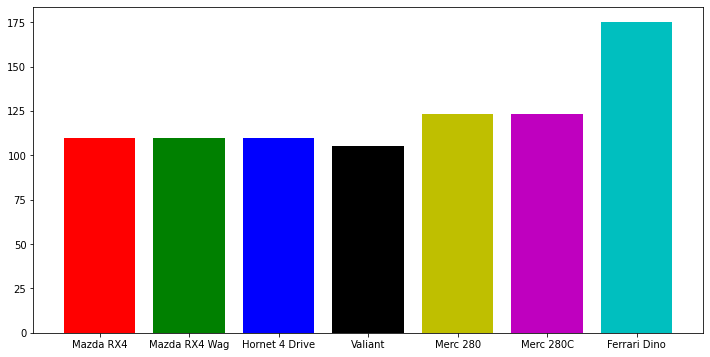

In [105]:
cyl6 = mtcars[mtcars['cyl'] == 6]
plt.figure(figsize=(12,6))
plt.bar(x='model', height='hp', color=list('rgbkymc'), data=cyl6)
plt.show()

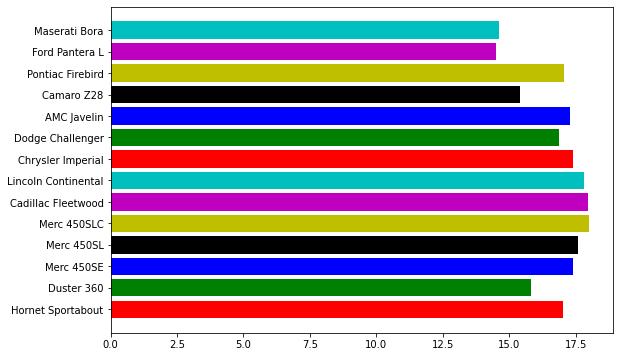

In [106]:
cyl8 = mtcars[mtcars['cyl'] == 8]
plt.figure(figsize=(9,6))
plt.barh(y='model', width='qsec', color=list('rgbkymc'), data=cyl8)
plt.show()

### Pie
`pie(x, explode=None, labels=None, colors=None, 
    autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, 
    counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, 
    normalize=None, data=None)`  

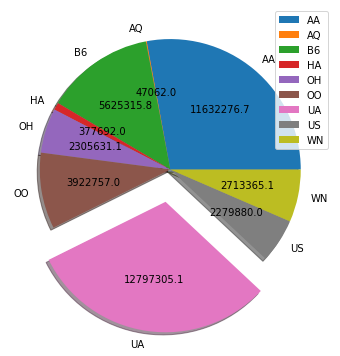

In [188]:
duration = flights.groupby('carrier', as_index=False).agg({'duration': 'sum'})
duration['is_ua'] = duration['carrier'].eq('UA').astype(int).div(4)

def pct_formatter(pct: float):
    #return format(pct, '.2f')
    return duration['duration'].mul(pct).div(100).sum().round(1)
    

plt.figure(figsize=(9,6))
plt.pie(x='duration', explode=duration.is_ua, labels='carrier', autopct=pct_formatter, shadow=True, data=duration)
plt.legend()
plt.show()

### Hist
`hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, 
    bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, 
    log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`  
histtype = {**'bar'**, 'barstacked', 'step', 'stepfilled'},

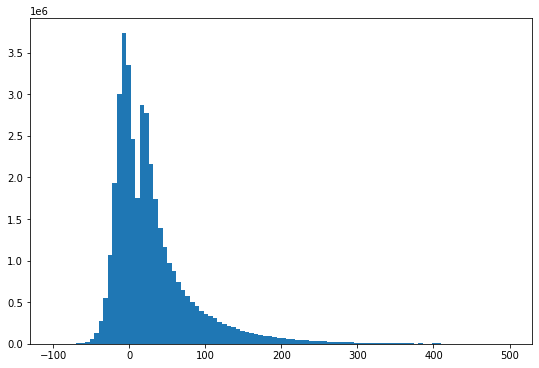

In [185]:
plt.figure(figsize=(9,6))
plt.hist(flights['delay'], weights=flights['duration'],
         bins=100, range=(-100, 500),  
         histtype='bar',
         density=False, cumulative=False)
plt.show()

### Форматування вісей


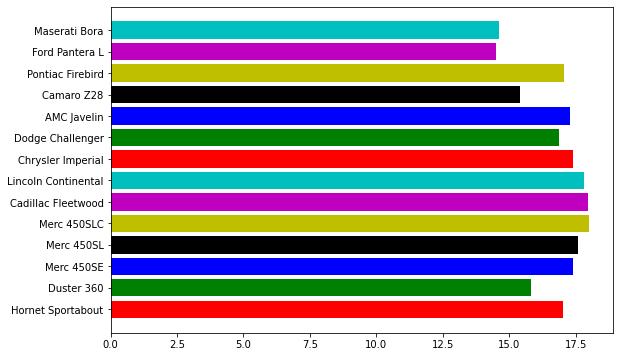

In [193]:
cyl8 = mtcars[mtcars['cyl'] == 8]
plt.figure(figsize=(9,6))
plt.barh(y='model', width='qsec', color=list('rgbkymc'), data=cyl8)
#plt.xticks(ticks=range(0,20))
plt.show()

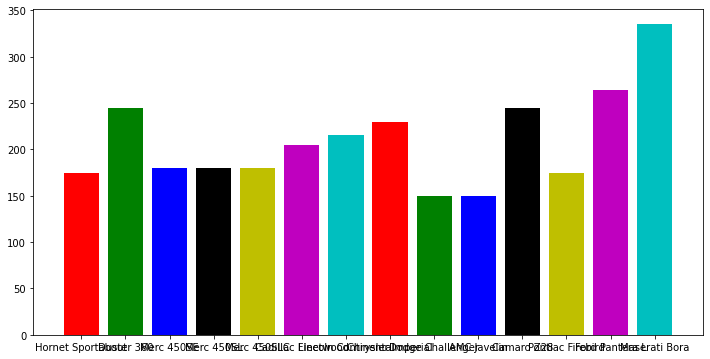

In [195]:
cyl8 = mtcars[mtcars['cyl'] == 8]
plt.figure(figsize=(12,6))
plt.bar(x='model', height='hp', color=list('rgbkymc'), data=cyl8)
#plt.xticks(rotation='vertical')
plt.show()

## Матеріали
* https://proglib.io/p/vasha-povsednevnaya-shpargalka-po-matplotlib-2021-02-04
* https://matplotlib.org/stable/tutorials/introductory/usage.html